In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')

In [107]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [55]:
df.shape

(10841, 13)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [57]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [58]:
## Missing Values
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Observaltion
- The data set has missing value

In [59]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [60]:
df['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [61]:
df['Reviews'].str.isnumeric().sum()

10840

In [62]:
df[~df['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [63]:
df_copy = df.copy()

In [64]:
df_copy = df_copy.drop(df_copy.index[10472])

In [65]:
df_copy['Size']=df_copy['Size'].str.replace('M','000')
df_copy['Size']=df_copy['Size'].str.replace('k','')
df_copy['Size']=df_copy['Size'].replace('Varies with device',np.nan)
df_copy['Size']=df_copy['Size'].astype(float)

In [66]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [67]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [68]:
chars_to_remove = ['+', ',', '$']
cols_to_clean = ['Installs', 'Price']
for item in chars_to_remove:
    for cols in cols_to_clean :
        df_copy[cols] = df_copy[cols].str.replace(item, '')

In [69]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [70]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])
df_copy['Day'] = df_copy['Last Updated'].dt.day
df_copy['Month'] = df_copy['Last Updated'].dt.month
df_copy['Year'] = df_copy['Last Updated'].dt.year

In [71]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  object        
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  object        
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  object        
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Day             10840 non-null  int64         
 14  Month           10840 non-null  int64         
 15  Ye

In [72]:
df_copy['Content Rating'].value_counts()

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        414
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

# EDA

In [73]:
df_copy[df_copy.duplicated('App')].shape

(1181, 16)

## Observation
- The dataset has duplicate records

In [74]:
df_copy = df_copy.drop_duplicates(subset=['App'], keep = 'first')

In [75]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)

In [76]:
df_copy['Installs']=df_copy['Installs'].astype(float)

In [77]:
df_copy['Price']=df_copy['Price'].astype(float)

In [78]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9659 non-null   object        
 1   Category        9659 non-null   object        
 2   Rating          8196 non-null   float64       
 3   Reviews         9659 non-null   int64         
 4   Size            8432 non-null   float64       
 5   Installs        9659 non-null   float64       
 6   Type            9658 non-null   object        
 7   Price           9659 non-null   float64       
 8   Content Rating  9659 non-null   object        
 9   Genres          9659 non-null   object        
 10  Last Updated    9659 non-null   datetime64[ns]
 11  Current Ver     9651 non-null   object        
 12  Android Ver     9657 non-null   object        
 13  Day             9659 non-null   int64         
 14  Month           9659 non-null   int64         
 15  Yea

In [79]:
numerical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype != 'O']
categorical_features = [feature for feature in df_copy.columns if df_copy[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated', 'Day', 'Month', 'Year']
We have 7 categorical features: ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver']


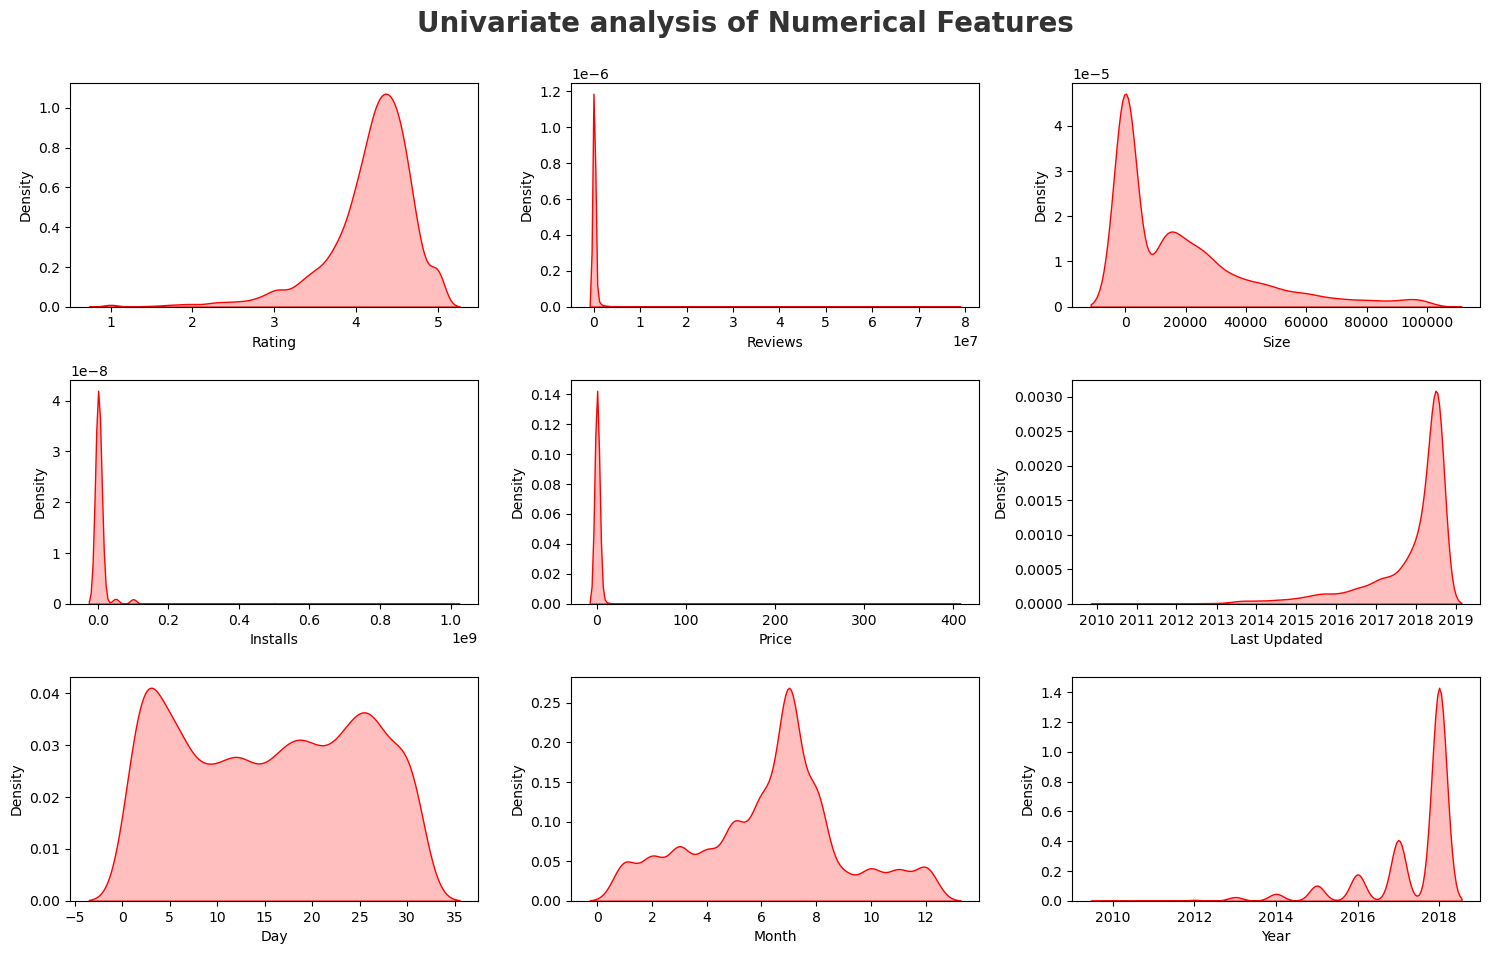

In [80]:
# Visualisation Diagrams for Numerical columns
plt.figure(figsize=(15,15))
plt.suptitle('Univariate analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=.8,y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df_copy[numerical_features[i]], shade=True , color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

# Observations
- Rating and Year is left skewed while Reviews,Size,Installs and Price are right skewed

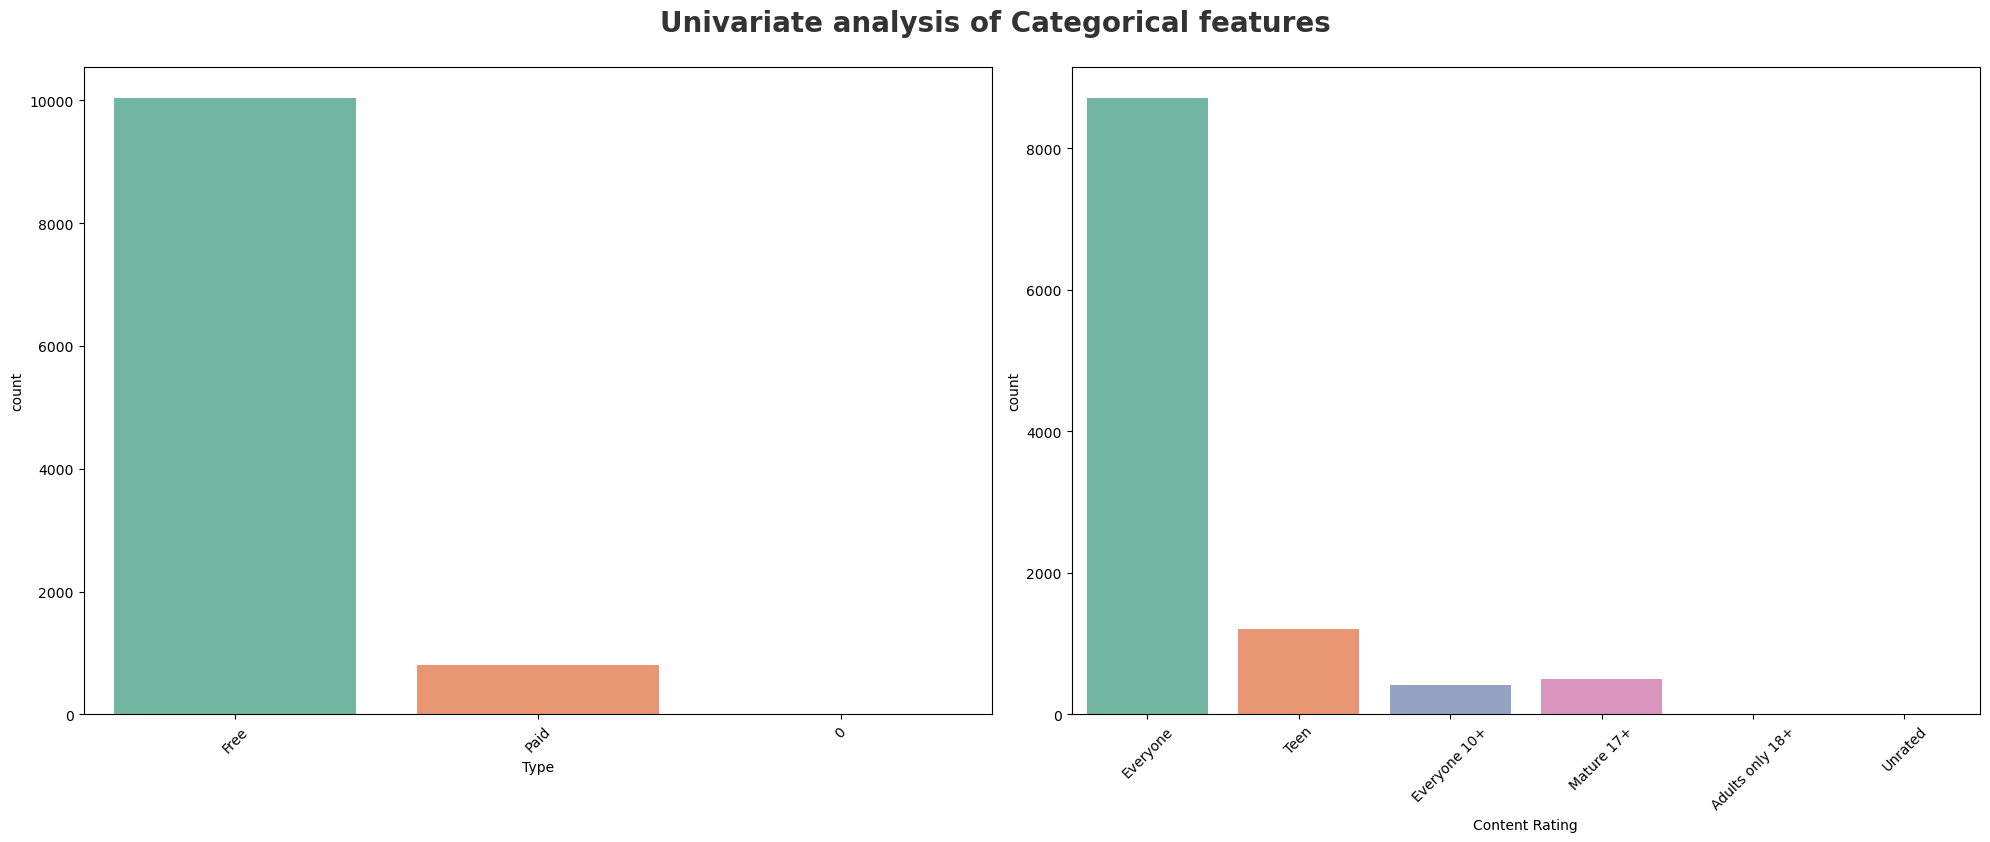

In [81]:
# Visualisation Diagrams for Numerical columns
plt.figure(figsize=(20,15))
plt.suptitle('Univariate analysis of Categorical features', fontsize=20, fontweight='bold', alpha=.8, y=1)
category = ['Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[category[i]], palette='Set2')
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()


# Which is the most popular category?

<AxesSubplot: ylabel='Category'>

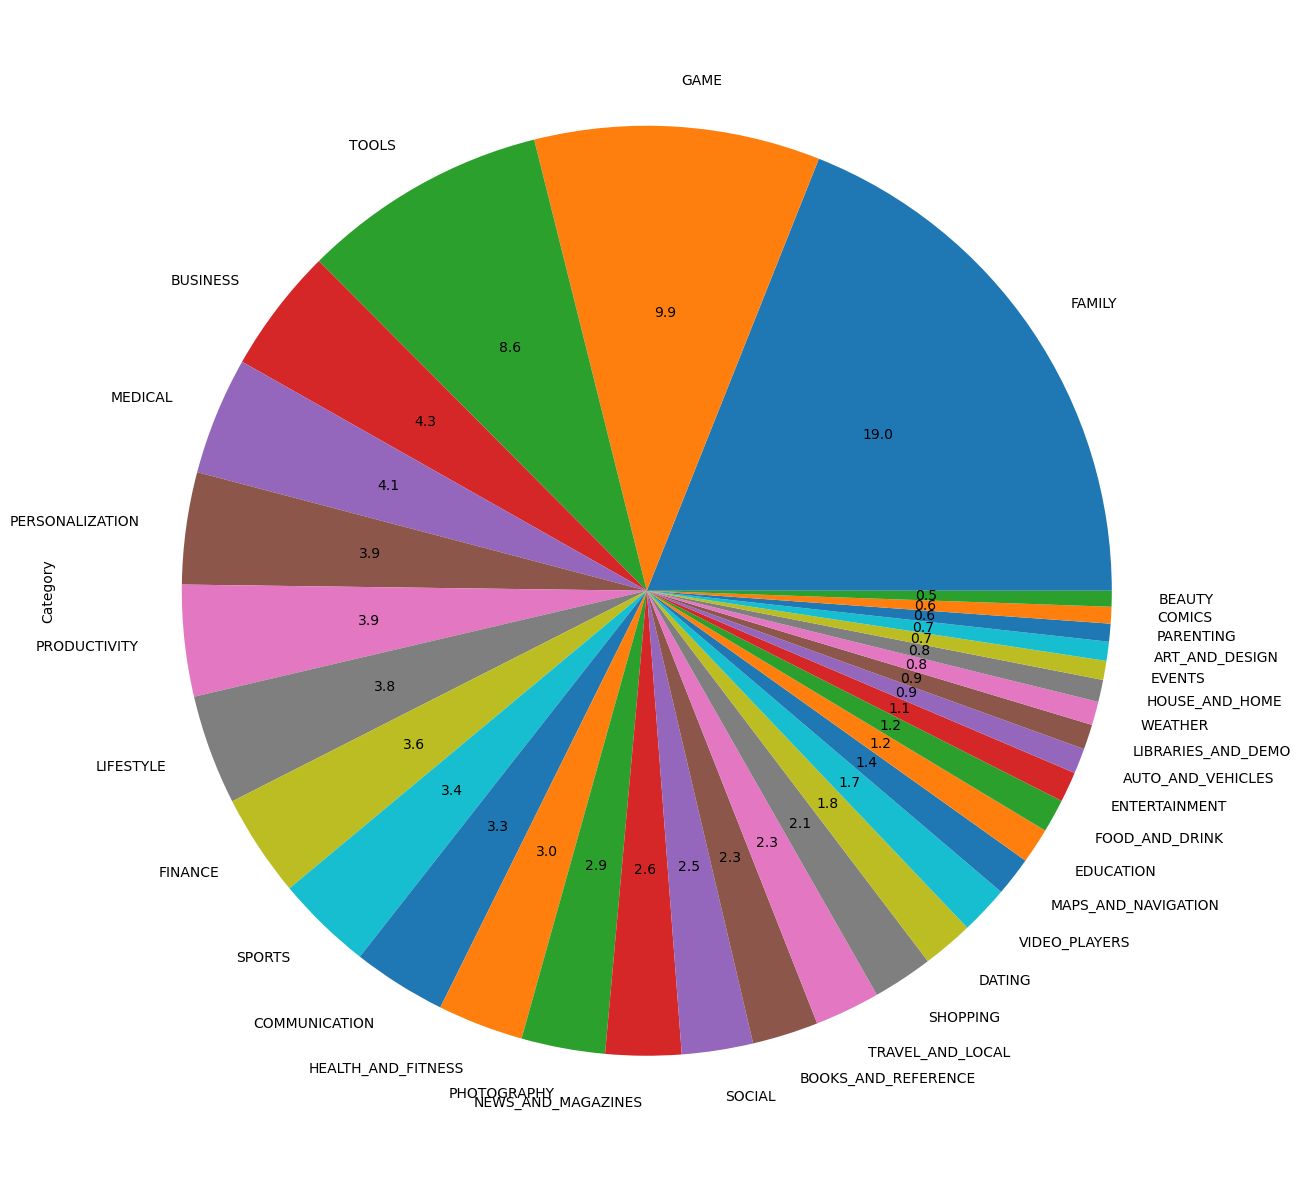

In [82]:
df_copy['Category'].value_counts().plot.pie(y=df_copy['Category'], figsize=(15,16), autopct='%1.1f')

# Observation
- There are more kinds of apps on playstore in category of Family, Game and tools
- Beauty, Comic, Arts and Weather kinds of apps are very less on playstore

In [83]:
## Top 10 App Categories
category = pd.DataFrame(df_copy['Category'].value_counts())        #Dataframe of apps on the basis of category
category.rename(columns = {'Category':'Count'},inplace=True)

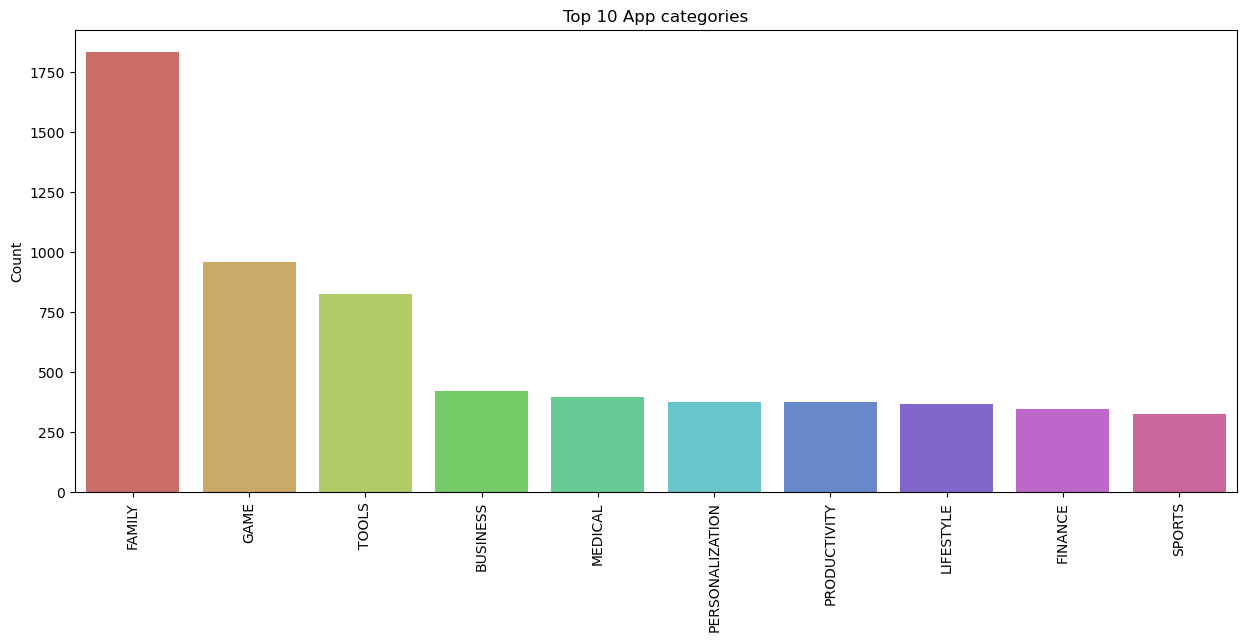

In [84]:
# Top 10 apps

plt.figure(figsize=(15,6))
sns.barplot(x=category.index[:10], y ='Count',data = category[:10],palette='hls')
plt.title('Top 10 App categories')
plt.xticks(rotation=90)
plt.show()

# Observation
- family category has the most number of apps

What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

In [87]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [90]:
df_copy['Size'].corr(df_copy['Rating'])

0.06122328116063458

Text(0.5, 1.0, 'Relationship between App Size and Rating')

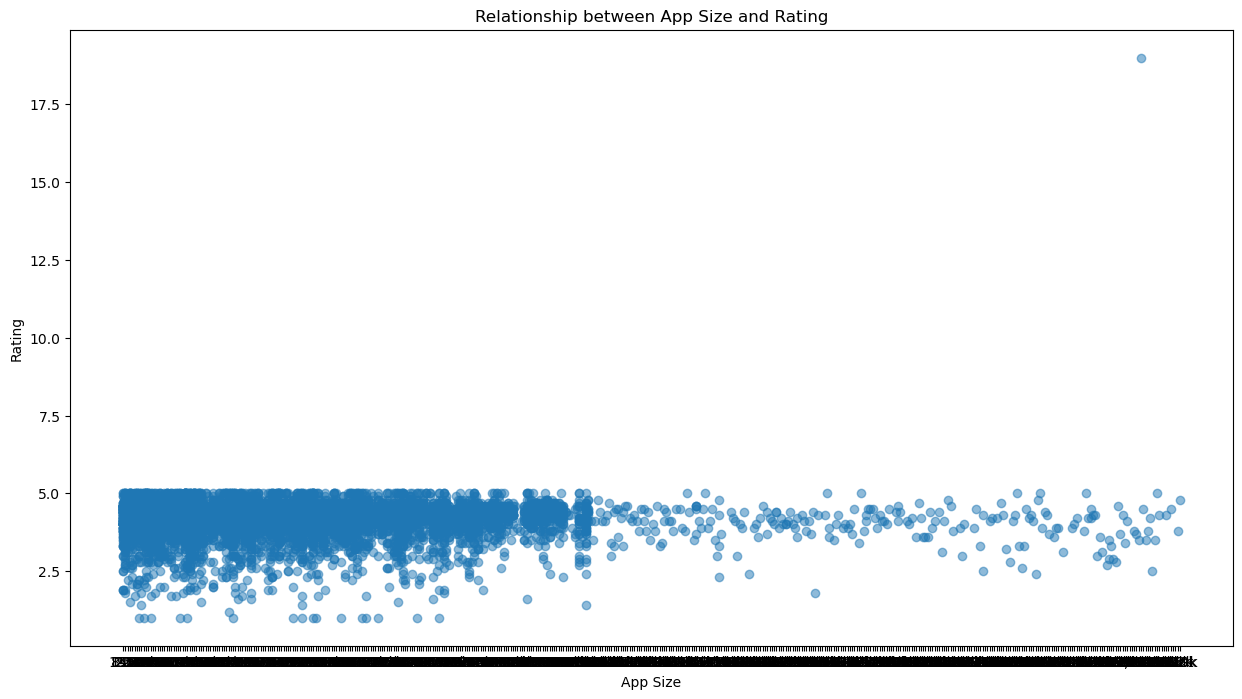

In [93]:
plt.figure(figsize=(15, 8))  
plt.scatter(df['Size'], df['Rating'], alpha=0.5)
plt.xlabel('App Size')
plt.ylabel('Rating')
plt.title('Relationship between App Size and Rating')

How does the type of app affect its price? Create a bar chart to compare average prices by app type.

<BarContainer object of 9659 artists>

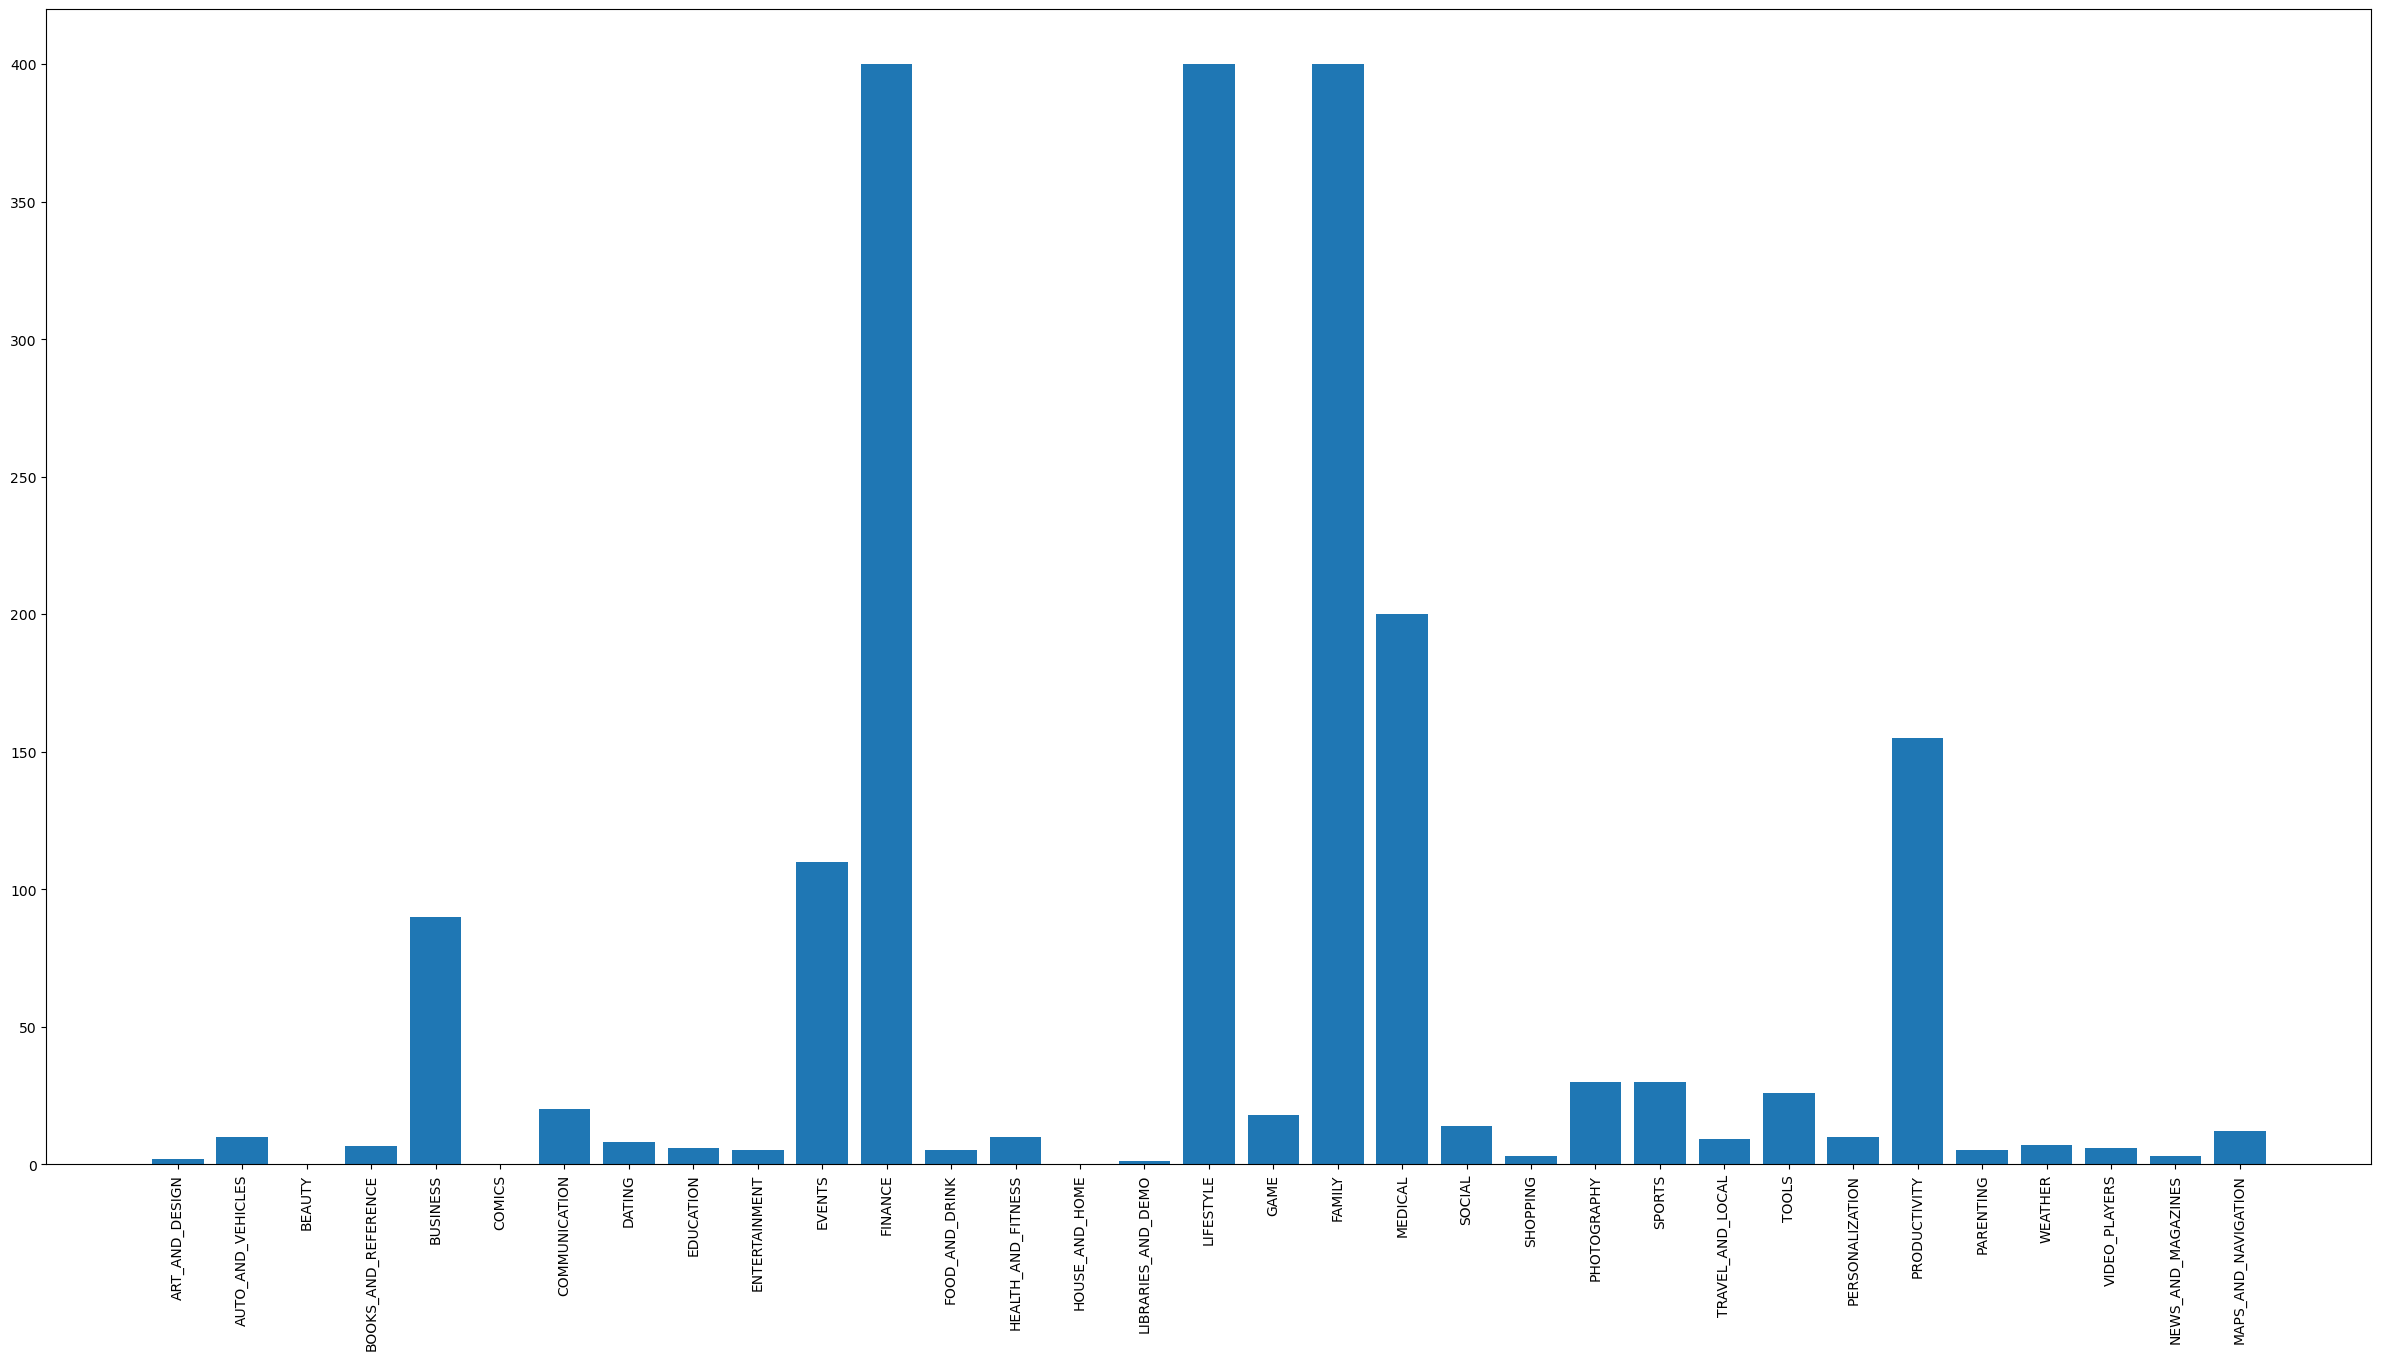

In [98]:
plt.figure(figsize=(30,15))
plt.xticks(rotation=90)
plt.bar(df_copy['Category'],df_copy['Price'])


# Observation
- Lifestyle, finance and health apps have the heighest cost

What are the top 10 most popular apps in the dataset?

In [104]:
df_copy.nlargest(10,'Installs')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1.000000e+09,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device,3,8,2018
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,3,8,2018
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1,8,2018
340,Gmail,COMMUNICATION,4.3,4604324,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device,2,8,2018
341,Hangouts,COMMUNICATION,4.0,3419249,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device,21,7,2018
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,NaN,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device,3,8,2018
865,Google Play Games,ENTERTAINMENT,4.3,7165362,NaN,1.000000e+09,Free,0.0,Teen,Entertainment,2018-07-16,Varies with device,Varies with device,16,7,2018
1654,Subway Surfers,GAME,4.5,27722264,76000.0,1.000000e+09,Free,0.0,Everyone 10+,Arcade,2018-07-12,1.90.0,4.1 and up,12,7,2018
2544,Facebook,SOCIAL,4.1,78158306,NaN,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device,3,8,2018
